In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns
from enum import Enum
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import svm 



In [2]:
def loadDataFromPath(thisPath, relativeDataPath):
    sys.path.append(thisPath)
    df = pd.read_csv(relativeDataPath)
    return df

In [3]:
thisPath = '.\\'
relativeDataPath = 'data\\heart-failure-clinical-data\\heart_failure_clinical_records_dataset.csv'
df = loadDataFromPath(thisPath, relativeDataPath)

In [4]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
def removeCategories(df):
    feature_cols = df.columns.tolist()
    #print("all feature columns", feature_cols)
    count = 0
    popped_features = []
    for i in range(len(feature_cols)):
        if isinstance(df.loc[0, feature_cols[count]], str):
            temp = feature_cols.pop(count)
            popped_features.append(temp)
            if count == 0:
                count = 0;
            else:
                count = count
        else:
            count = count + 1
    #print("feature columns without categorical items", feature_cols)   
    return feature_cols, popped_features   

In [6]:
def assignFeaturesLabelsFromDF(df, labelIdx, removeColumn):
    feature_cols, popped_features = removeCategories(df)
    label = feature_cols.pop(labelIdx)
    feature_cols.remove(removeColumn)
    return feature_cols, label
    

In [7]:
labelIdx = -1
removeColumn = 'time'
features, label = assignFeaturesLabelsFromDF(df, labelIdx, removeColumn)

In [8]:
features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking']

In [9]:
label

'DEATH_EVENT'

### Assign Input Variables

In [10]:
X = df[features]
y = df[label]

In [11]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


### Standardize features to prevent one feature from dominating the other

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def standardizeFeatures(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

In [13]:
X = standardizeFeatures(X)

In [14]:
X

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -1.50403612e+00,  7.35688190e-01, -6.87681906e-01],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -1.41976151e-01,  7.35688190e-01, -6.87681906e-01],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
        -1.73104612e+00,  7.35688190e-01,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
         3.12043840e-01, -1.35927151e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.66063830e-01,  7.35688190e-01,  1.45416070e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
        -1.41976151e-01,  7.35688190e-01,  1.45416070e+00]])

### Split the dataset into training & testing

In [15]:
from sklearn.model_selection import train_test_split
def splitData(X, y, testSize, randomState):
    return train_test_split(X, y, test_size=testSize, random_state=randomState)

In [16]:
X_train, X_test, y_train, y_test = splitData(X, y, 0.2, 2)
print("size of training data")
print(X_train.shape)
print(y_train.shape)
print("size of testing data")
print(X_test.shape)
print(y_test.shape)

size of training data
(239, 11)
(239,)
size of testing data
(60, 11)
(60,)


### SUPPORT VECTOR MACHINE (SVM)

In [17]:
def svm(X_train, y_train, X_test, y_test):
    # Instantiating the SVM algorithm 
    model1=SVC()
    
    # Fitting the model 
    model1.fit (X_train, y_train)
    
    # Predicting the test variables
    y_pred = model1.predict(X_test)
    
    # Getting the score 
    model1.score (X_test, y_test)
    # Printing classification report (since there was biasness in target labels)
    print(classification_report(y_test, y_pred))
    # Getting the confusion matrix
    cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
    plt.subplots(figsize=(10,7))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        43
           1       0.56      0.53      0.55        17

    accuracy                           0.75        60
   macro avg       0.69      0.68      0.69        60
weighted avg       0.75      0.75      0.75        60



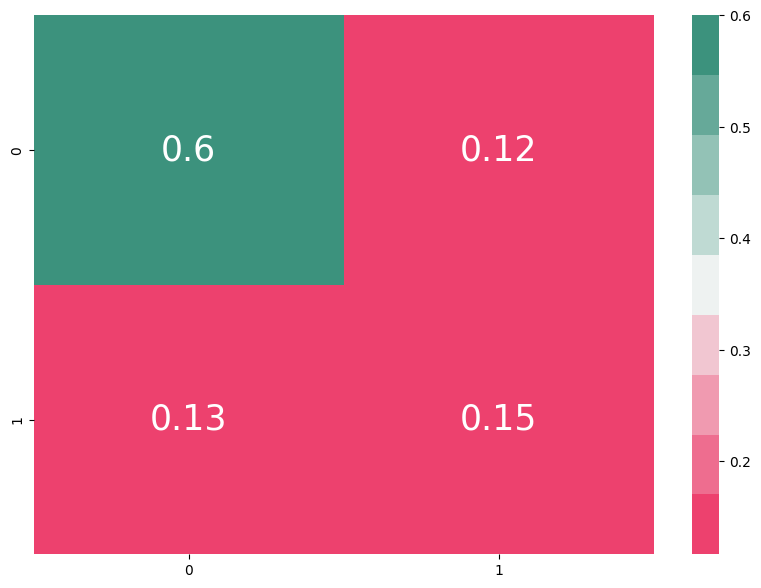

In [18]:
svm(X_train, y_train, X_test, y_test)